# matplotlib projections

Out of the box, `matplotlib` supports different types of projections: ways of plotting data that isn't confined to a rectangular `x` & `y` coordinate space.

In [13]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord, Angle, Galactocentric
import astropy.units as u
from colors import colors

In [3]:
# Let's display galactic star clusters in our region of space, from our vantage point and the view from our galaxy's centre

clusters = pd.read_csv('../data/star-clusters.csv', index_col=0)

# What's in here? (We're using the first column of the source data as the index)
clusters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3006 entries, 0 to 3005
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RAhour  3006 non-null   float64
 1   DEdeg   3006 non-null   float64
 2   radius  3006 non-null   float64
 3   d       3006 non-null   float64
dtypes: float64(4)
memory usage: 117.4 KB


<ipython-input-21-d5fc7e5549a9>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0h','3h','6h','9h','12h','15h','18h','21h'])
<ipython-input-21-d5fc7e5549a9>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['2kpc', '4kpc', '6kpc', '8kpc'])
<ipython-input-21-d5fc7e5549a9>:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['', '4kpc', '', '8kpc', '', '12kpc', '', '16kpc'])


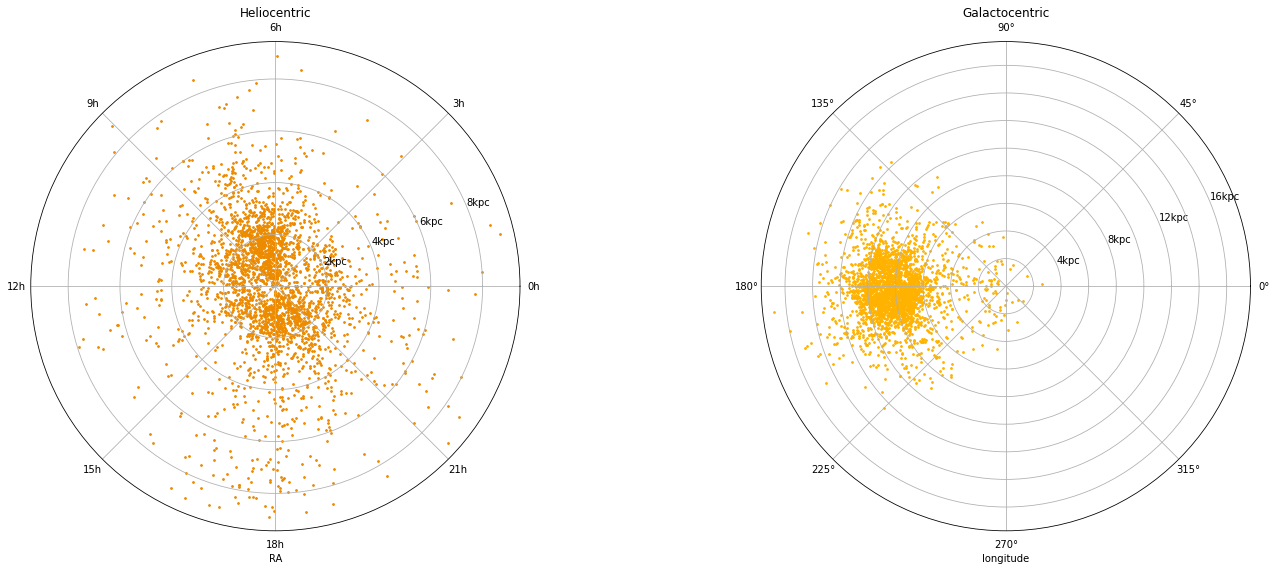

In [21]:
# Prepare the data
# Let's only include clusters within 9000 parsecs
data = clusters[clusters['d'] < 9000]

# Convert to an `Angle` object to make conversions a little easier, as projections need to use radians
ra = Angle(data['RAhour'].to_numpy() * u.hourangle)
distance = data['d'].to_numpy()

cs = np.array(
    [
        SkyCoord(ra=row.RAhour * u.hourangle,
                       dec=row.DEdeg * u.degree, distance=row.d * u.pc)
        for row in data.itertuples()
    ]
)

# Plot clusters to galacto-centric coordinates
# These are cartesian x,y,z coordinates
gcs = np.array([c.transform_to(Galactocentric) for c in cs])

# Transform them into spherical coordinates
sphs = np.array([
    [
        g.spherical.lon.radian,
        g.spherical.lat.radian,
        g.spherical.distance.value
    ]
    for g in gcs
])

# This time we're specifying two separate plots within the figure
fig = plt.figure(figsize=(24,9))
ax1 = fig.add_subplot(1, 2, 1, projection='polar')
ax1.set_title('Heliocentric')
ax1.set_xlabel('RA')
ax1.set_xticklabels(['0h','3h','6h','9h','12h','15h','18h','21h'])
ax1.set_yticklabels(['2kpc', '4kpc', '6kpc', '8kpc'])
ax1.scatter(ra.radian, distance, c=colors['orange'], s=3)

ax2 = fig.add_subplot(1, 2, 2, projection='polar')
ax2.set_title('Galactocentric')
ax2.set_xlabel('longitude')
ax2.set_yticklabels(['', '4kpc', '', '8kpc', '', '12kpc', '', '16kpc'])
ax2.scatter(sphs[:, 0], sphs[:, 2], s=3, c=colors['yellow']);


In [18]:
# Now let's plot the galaxy clusters against galactic longitude and latitude
# as seen from our vantage point
data = pd.read_csv('../data/abell-galaxy-clusters-simplified.csv')


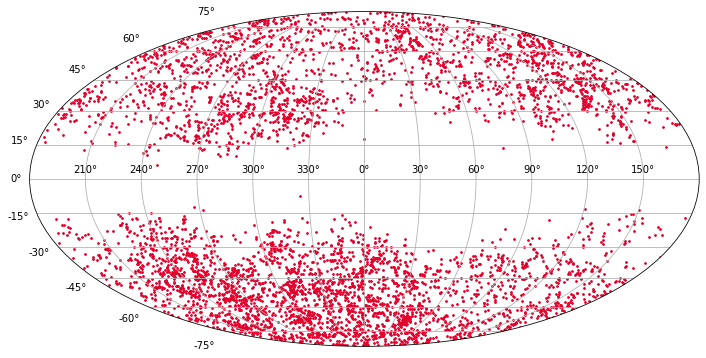

In [20]:
# Prepare data
long = Angle(data['GLON_2000'].to_numpy() * u.degree)
long = long.wrap_at(180 * u.degree)
lat = Angle(data['GLAT_2000'].to_numpy() * u.degree)

# Plot
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(projection='mollweide')
ax.set_title('Galaxy clusters plotted against the galactic plane')
ax.set_xticklabels(['210°', '240°', '270°', '300°', '330°',
                    '0°', '30°', '60°', '90°', '120°', '150°'])
ax.scatter(long.radian, lat.radian, s=3, c=colors['reaRed'])
ax.grid(True);